In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from modules.utility import get_csv_data, save_csv
import datetime
import logging
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
def get_season_df(df, season_col, season_val):
    data = df.copy()
    logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.INFO)
    logging.info('Retrieving season index...')
    season_idx = data[season_col] == season_val
    logging.info('Extracting season data...')
    season_df = data[season_idx]
    logging.info('Process completed data returned.')
    return season_df

def get_perod_bf_season(train_df, season_df, days_bf):
    train_cp = train_df.copy()
    season_cp = season_df.copy()
    season_cp['before'] = season_cp['Date'].apply(lambda x:x-datetime.timedelta(days=days_bf))
    bef_dates = list(set(season_cp['before']))
    bef_dates_idx = train_cp['Date'].apply(lambda x:x in bef_dates)
    bef_df = train_cp[bef_dates_idx]
    return bef_df

def get_perod_aft_season(train_df, season_df, days_aft):
    train_cp = train_df.copy()
    season_cp = season_df.copy()
    season_cp['after'] = season_cp['Date'].apply(lambda x:x+datetime.timedelta(days=days_aft))
    aft_dates = list(set(season_cp['after']))
    aft_dates_idx = train_cp['Date'].apply(lambda x:x in aft_dates)
    aft_df = train_cp[aft_dates_idx]
    return aft_df
def get_day_name(x):
    name_dict = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
    return name_dict[x]

In [ ]:
def plot_purchase_behv(bf_df, dur_bf, aft_df, title):
    bf_df = bf_df.copy()
    dur_bf = dur_bf.copy()
    aft_df = dur.copy()
    
    fig, ax = plt.subplots(figsize=(20,10))
    sns.set_style('darkgrid', {'axes.facecolor': '.9'})
    sns.set_palette(palette='deep')
    sns_c = sns.color_palette(palette='deep')

    sns.lineplot(x='Day', y='Sales', label='5days before', data=bf_df.groupby(['DayOfWeek','Day']).sum(), ax=ax, color = 'blue')
    sns.lineplot(x='Day', y='Sales', label='Public Holiday', data=dur_df.groupby(['DayOfWeek','Day']).sum(), ax=ax, color = 'green')
    sns.lineplot(x='Day', y='Sales', label='5days after', data=aft_df.groupby(['DayOfWeek','Day']).sum(), ax=ax, color = 'red')

    ax.legend(loc='best', fontsize=16)
    ax.set_xlabel('Day',fontsize=16)
    ax.set_ylabel('Sales',fontsize=16)
    ax.tick_params(axis='x', rotation=45, labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_title('title', fontsize=20)

In [81]:
train['Date'][0].weekday()

4

In [84]:
def get_day_name(x):
    name_dict = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
    return name_dict[x]

In [142]:
train['Date'][0].month

7

In [78]:
train.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [67]:
#season_idx = 
train[train['StateHoliday'] == 'a']

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
63555        1          4 2015-06-04      0          0     0      1   
63557        3          4 2015-06-04      0          0     0      1   
63559        5          4 2015-06-04   5807        625     1      1   
63560        6          4 2015-06-04   5749        614     1      1   
63563        9          4 2015-06-04      0          0     0      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
63555              a              0  
63557              a              0  
63559              a              0  
63560              a              0  
63563              a              0  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[20260 rows x 9 columns]

Text(0.5, 1.0, 'Public Holidays Purchase Behavior')

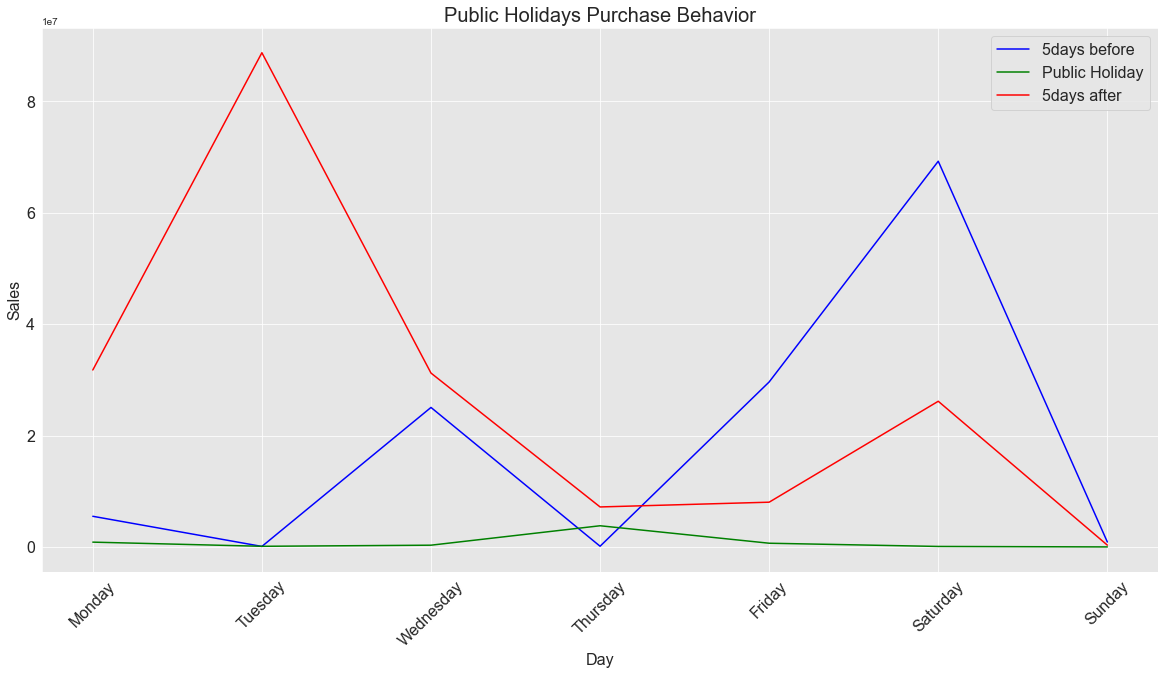

In [143]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
sns.lineplot(x='Day', y='Sales', label='5days before', data=public_holiday_bf.groupby(['DayOfWeek','Day']).sum(), ax=ax, color = 'blue')
sns.lineplot(x='Day', y='Sales', label='Public Holiday', data=public_holiday.groupby(['DayOfWeek','Day']).sum(), ax=ax, color = 'green')
sns.lineplot(x='Day', y='Sales', label='5days after', data=public_holiday_aft.groupby(['DayOfWeek','Day']).sum(), ax=ax, color = 'red')

ax.legend(loc='best', fontsize=16)
ax.set_xlabel('Day',fontsize=16)
ax.set_ylabel('Sales',fontsize=16)
ax.tick_params(axis='x', rotation=45, labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title('Public Holidays Purchase Behavior', fontsize=20)

## Read data

In [26]:
train = get_csv_data(path='data/train.csv', version='v1')

test = get_csv_data(path='data/test.csv', version='v1')

store = get_csv_data(path='data/store.csv', version='v1')

Reading data from dvc source....


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Reading completed, data returned


In [138]:
store.head().isnull().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [86]:
train['Date'] = pd.to_datetime(train['Date'])
train['Day'] = train['DayOfWeek'].apply(get_day_name)
test['Date'] = pd.to_datetime(test['Date'])
test['Day'] = test['DayOfWeek'].apply(get_day_name)

In [30]:
test.head()

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4 2015-09-17   1.0      1            0              0
1   2      3          4 2015-09-17   1.0      1            0              0
2   3      7          4 2015-09-17   1.0      1            0              0
3   4      8          4 2015-09-17   1.0      1            0              0
4   5      9          4 2015-09-17   1.0      1            0              0

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [104]:
public_holiday = get_season_df(df=train, season_col='StateHoliday', season_val='a')
public_holiday_bf = get_perod_bf_season(train_df=train, season_df=public_holiday, days_bf=5)
public_holiday_aft = get_perod_aft_season(train_df=train, season_df=public_holiday, days_aft=5)

In [123]:
easter_holiday = get_season_df(df=train, season_col='StateHoliday', season_val='b')
easter_holiday_bf = get_perod_bf_season(train_df=train, season_df=easter_holiday, days_bf=5)
easter_holiday_aft = get_perod_aft_season(train_df=train, season_df=easter_holiday, days_aft=5)

In [124]:
xmas_holiday = get_season_df(df=train, season_col='StateHoliday', season_val='c')
xmas_holiday_bf = get_perod_bf_season(train_df=train, season_df=xmas_holiday, days_bf=5)
xmas_holiday_aft = get_perod_aft_season(train_df=train, season_df=xmas_holiday, days_aft=5)

In [ ]:
def get_season_df(df, season_col, season_val):
    data = df.copy()
    season_idx = data[season_col] == season_val
    season_df = data[season_idx]
    return season_df

def get_perod_bf_season(train_df, season_df, days_bf):
    train_cp = train_df.copy()
    season_cp = season_df.copy()
    season_cp['before'] = season_cp['Date'].apply(lambda x:x-datetime.timedelta(days=days_bf))
    bef_dates = list(set(season_cp['before']))
    bef_dates_idx = train_cp['Date'].apply(lambda x:x in bef_dates)
    bef_df = train_cp[bef_dates_idx]
    return bef_df

def get_perod_aft_season(train_df, season_df, days_aft):
    train_cp = train_df.copy()
    season_cp = season_df.copy()
    season_cp['before'] = season_cp['Date'].apply(lambda x:x-datetime.timedelta(days=days_aft))
    aft_dates = list(set(season_cp['before']))
    aft_dates_idx = train_cp['Date'].apply(lambda x:x in aft_dates)
    aft_df = train_cp[aft_dates_idx]
    return aft_df

In [10]:
public_holiday = train[public_holiday_idx]
easter_holdays = train[easter_holiday_idx]
xmas_holidays = train[xmas_holidays_idx]

In [11]:
import datetime

today = datetime.date.today()
print ('Today    :', today)

one_day = datetime.timedelta(days=5)
print ('One day  :', one_day)

yesterday = today - one_day
print ('Yesterday:', yesterday)

tomorrow = today + one_day
print ('Tomorrow :', tomorrow)

print ('tomorrow - yesterday:', tomorrow - yesterday)
print ('yesterday - tomorrow:', yesterday - tomorrow)

Today    : 2021-07-27
One day  : 5 days, 0:00:00
Yesterday: 2021-07-22
Tomorrow : 2021-08-01
tomorrow - yesterday: 10 days, 0:00:00
yesterday - tomorrow: -10 days, 0:00:00


In [12]:
public_holiday['before'] = public_holiday['Date'].apply(lambda x:x-datetime.timedelta(days=5))

<ipython-input-12-a947641c0194>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_holiday['before'] = public_holiday['Date'].apply(lambda x:x-datetime.timedelta(days=5))


In [13]:
public_holiday['after'] = public_holiday['Date'].apply(lambda x:x+datetime.timedelta(days=5))

<ipython-input-13-04dfa063f010>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_holiday['after'] = public_holiday['Date'].apply(lambda x:x+datetime.timedelta(days=5))


In [20]:
bef = list(set(public_holiday['before']))

In [23]:
train[train['Date'].apply(lambda x:x in bef)]['Date'].unique()

array(['2015-05-30T00:00:00.000000000', '2015-05-20T00:00:00.000000000',
       '2015-05-09T00:00:00.000000000', '2015-04-26T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2014-12-27T00:00:00.000000000',
       '2014-11-14T00:00:00.000000000', '2014-10-27T00:00:00.000000000',
       '2014-10-26T00:00:00.000000000', '2014-09-28T00:00:00.000000000',
       '2014-06-14T00:00:00.000000000', '2014-06-04T00:00:00.000000000',
       '2014-05-24T00:00:00.000000000', '2014-04-26T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2013-12-27T00:00:00.000000000',
       '2013-11-15T00:00:00.000000000', '2013-10-27T00:00:00.000000000',
       '2013-10-26T00:00:00.000000000', '2013-09-28T00:00:00.000000000',
       '2013-08-10T00:00:00.000000000', '2013-05-25T00:00:00.000000000',
       '2013-05-15T00:00:00.000000000', '2013-05-04T00:00:00.000000000',
       '2013-04-26T00:00:00.000000000', '2013-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
set(public_holiday['after'])

In [ ]:
yr2013 = train[train['Date'].str.contains('2013-12')]

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])

In [ ]:
train['month'] = train['Date'].apply(lambda x:x.month)

In [ ]:
train.groupby('month').sum().plot( y='Sales')

In [ ]:
train.plot(x='Date', y='Sales', figsize=(20,10), kind='line')

In [ ]:
test['Date'] = pd.to_datetime(test['Date'])

In [ ]:
test['month'] = test['Date'].apply(lambda x:x.month)

In [ ]:
test.groupby('month').sum().plot(y='')

In [ ]:
train.plot(x='Date', y='Sales')
plt.figure(figsize=(20, 20))
plt.show()